In [13]:
# General imports
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF

from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_peak_search
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series
from scipy.signal import butter, lfilter
import fastdyn_fic_dmf as dmf
import numpy as np
import matplotlib.pyplot as plt
# Fetch default parameters
import tracemalloc
from scipy.io import loadmat
from scipy.stats import zscore, pearsonr
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper

In [59]:
nb_steps = 100000
C = loadmat('../SC_and_5ht2a_receptors.mat')['sc90']
C = 0.2*C/np.max(C)
params = dmf.default_params(C=C)
params['seed'] = 1
params['G'] = 5.5
params['lrj'] = 14 
params['obj_rate'] = 3.44
params['taoj'] = 30000
params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1
N = C.shape[0]
with_decay = True
with_plasticity = True
rates, rates_inh, bold, fic_t = dmf.run(params, nb_steps,return_rate=True, return_bold=True, return_fic=True, with_plasticity=with_plasticity, with_decay=with_decay)
brunout = 5
rates = rates[:, np.ceil(brunout * 1000).astype(int):]
rates_inh = rates_inh[:, np.ceil(brunout * 1000).astype(int):]
fic_t = fic_t[:, np.ceil(brunout * 1000).astype(int):]

In [60]:
# Load example data signal
sig = rates[0,:]

# Set sampling rate, and create a times vector for plotting
fs = 10000
times = create_times(len(sig)/fs, fs)


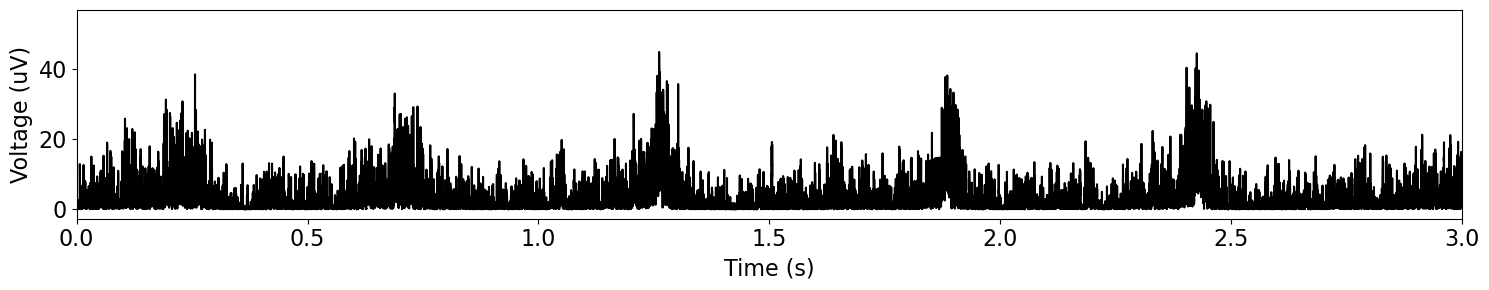

In [61]:
# Plot the loaded signal
plot_time_series(times, sig, xlim=[0, 3])

In [62]:
# Mean of spectrogram (Welch)
freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)


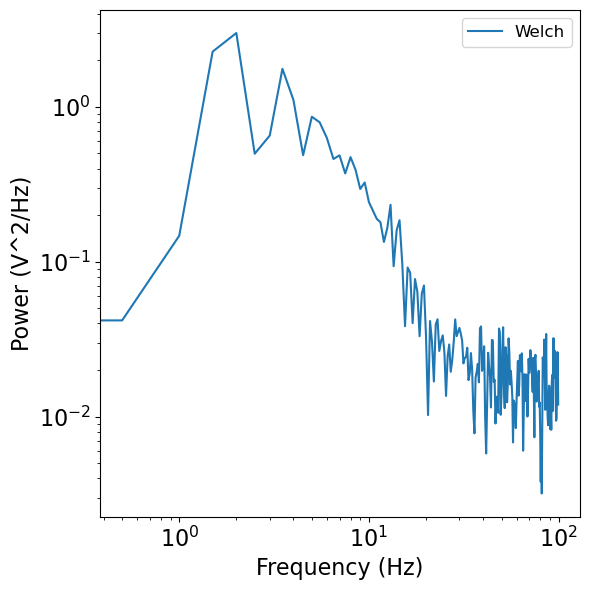

In [63]:
# Plot the power spectra
plot_power_spectra([freq_mean[:200]],
                   [psd_mean[:200]],
                   ['Welch'])

In [64]:
# Set whether to plot in log-log space
plt_log = False
# Load example data files needed for this example
freqs = freq_mean
spectrum = psd_mean
# Initialize a FOOOF object, with some settings
#   These settings will be more fully described later in the tutorials
fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, min_peak_height=0.15)
# Add data to the object
fm.add_data(freqs, spectrum, [0.1, 40])

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.0448, 0.3758                                          
                                                                                                  
                                       4 peaks were found:                                        
          

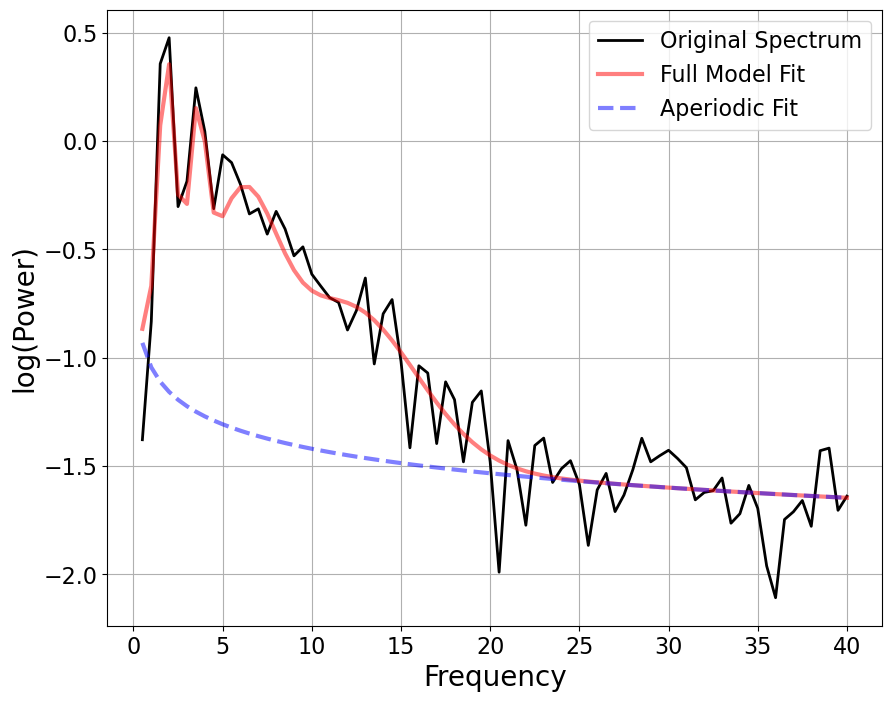

In [65]:
fm.report(freqs, spectrum, [0.1, 40])